In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [3]:
walk_through_dir(r"C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\OriginalDataset")

There are 4 directories and 0 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\OriginalDataset'.
There are 0 directories and 896 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\OriginalDataset\MildDemented'.
There are 0 directories and 64 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\OriginalDataset\ModerateDemented'.
There are 0 directories and 3200 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\OriginalDataset\NonDemented'.
There are 0 directories and 2240 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\OriginalDataset\VeryMildDemented'.


In [4]:
walk_through_dir(r"C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\AugmentedAlzheimerDataset")


There are 4 directories and 0 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\AugmentedAlzheimerDataset'.
There are 0 directories and 0 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\AugmentedAlzheimerDataset\MildDemented'.
There are 0 directories and 0 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\AugmentedAlzheimerDataset\ModerateDemented'.
There are 0 directories and 0 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\AugmentedAlzheimerDataset\NonDemented'.
There are 0 directories and 0 images in 'C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\AugmentedAlzheimerDataset\VeryMildDemented'.


In [5]:
import os
import random
import shutil

def split_data(source_dir, train_dir, test_dir, split_ratio):
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            num_images = len(images)
            num_train = int(num_images * split_ratio)
            random.shuffle(images)

            train_images = images[:num_train]
            test_images = images[num_train:]

            class_train_dir = os.path.join(train_dir, class_name)
            class_test_dir = os.path.join(test_dir, class_name)

            os.makedirs(class_train_dir, exist_ok=True)
            os.makedirs(class_test_dir, exist_ok=True)

            for image in train_images:
                src_path = os.path.join(class_dir, image)
                dest_path = os.path.join(class_train_dir, image)
                shutil.move(src_path, dest_path)

            for image in test_images:
                src_path = os.path.join(class_dir, image)
                dest_path = os.path.join(class_test_dir, image)
                shutil.move(src_path, dest_path)

if __name__ == "__main__":
    source_dir = r"C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\AugmentedAlzheimerDataset"
    train_dir = r"C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\TrainDataset"
    test_dir = r"C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\TestDataset"
    split_ratio = 0.8  # 80% for training, 20% for testing

    split_data(source_dir, train_dir, test_dir, split_ratio)


In [6]:
train_dir = r"C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\TrainDataset"
test_dir = r"C:\Users\ramun\Downloads\AIML\DEEP LEARNING\Alzymersdataset\TestDataset"

# preprocess the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# load data from directory and make it to batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical",
                                               shuffle = True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical",
                                             shuffle = True)


Found 27187 images belonging to 4 classes.
Found 6797 images belonging to 4 classes.


In [8]:
#img_size = (224, 224)
#train_data = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
#                                                         image_size= img_size,
#                                                         label_mode="categorical",
#                                                         batch_size = 32)

#test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
#                                                        image_size = img_size,
#                                                        label_mode = "categorical",
#                                                        batch_size = 32)

In [8]:
train_data

In [9]:
test_data

In [10]:
# See an example of a batch of data
# Get a batch of data
images, labels = next(train_data)

print(images.shape)  # Should print the shape of the batch of images, e.g., (32, 224, 224, 3) for 32 images of size 224x224 with 3 channels (RGB)
print(labels.shape)  # Should print the shape of the batch of labels, e.g., (32, num_classes) if you have 'num_classes' classes in your dataset

(32, 224, 224, 3)
(32, 4)


In [11]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array([item.name for item in data_dir.glob('*')])
print(class_names)

['MildDemented' 'ModerateDemented' 'NonDemented' 'VeryMildDemented']


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import os

def view_random_image(target_dir, target_class):
    # setup the target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)  # randomly sample one item from target_folder
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mping.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape: {img.shape}")
    return img


['4b619a6e-26ba-463c-918b-47ef40a88f02.jpg']
image shape: (190, 200, 3)


array([[[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       ...,

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]]], dtype=uint8)

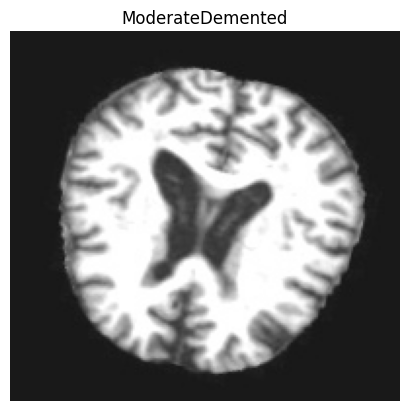

In [13]:
view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [14]:
import os
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join(dir_name, experiment_name, current_time)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

Model_0 using only cnn without any models like vgg16 , efficientnet etc

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation

model_0 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           padding = "valid",
           strides = 1,
           activation = "relu",
           input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10, 3,activation = "relu"),
    Dense(10, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3,activation = "relu"),
    Conv2D(10, 3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation = "softmax")
])

#compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_1 = model_0.fit(
    train_data,
    epochs=20,
    steps_per_epoch = len(train_data),
    validation_data=test_data,
    validation_steps = len(test_data),
    callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="Alzymersdataset")]
)

Saving TensorBoard log files to: tensorflow_hub\Alzymersdataset\20230807-212023
Epoch 1/20
850/850 [==============================] - 563s 662ms/step - loss: 0.8365 - accuracy: 0.6408 - val_loss: 0.6532 - val_accuracy: 0.7252
Epoch 2/20
850/850 [==============================] - 531s 625ms/step - loss: 0.4742 - accuracy: 0.8202 - val_loss: 0.4935 - val_accuracy: 0.8098
Epoch 3/20
850/850 [==============================] - 526s 619ms/step - loss: 0.3215 - accuracy: 0.8804 - val_loss: 0.4921 - val_accuracy: 0.8214
Epoch 4/20
850/850 [==============================] - 522s 614ms/step - loss: 0.2291 - accuracy: 0.9148 - val_loss: 0.5208 - val_accuracy: 0.8380
Epoch 5/20
850/850 [==============================] - 520s 612ms/step - loss: 0.1685 - accuracy: 0.9371 - val_loss: 0.5662 - val_accuracy: 0.8308
Epoch 6/20
850/850 [==============================] - 530s 624ms/step - loss: 0.1276 - accuracy: 0.9535 - val_loss: 0.6639 - val_accuracy: 0.8346
Epoch 7/20
850/850 [========================

In [16]:
# plotting the validation and training curves seperately

def plot_loss_curves(history):
    """
    Return loss curves for training and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) #how many epochs did we run for

    #plot the loss
    plt.plot(epochs, loss, label = "Training_loss")
    plt.plot(epochs, val_loss, label = "Validation_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot the accuracy 
    plt.figure() # we use this so that we can create seperate figures for loss and accuracy
    plt.plot(epochs, accuracy, label = "Training_accuracy")
    plt.plot(epochs, val_accuracy, label = "validation_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

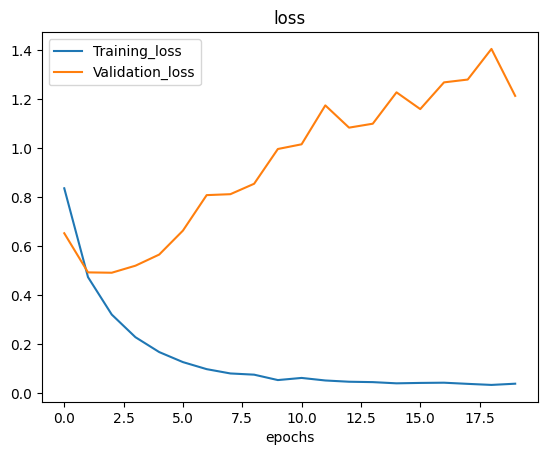

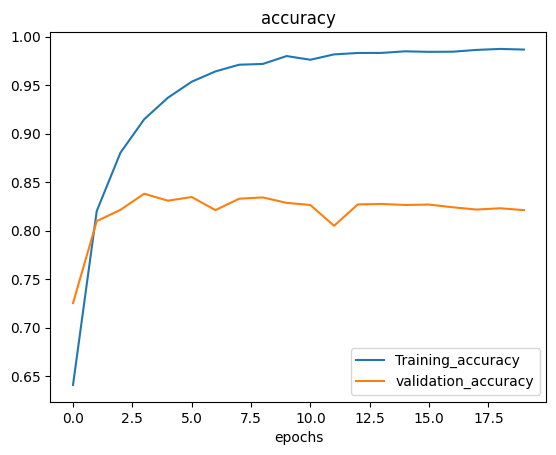

In [17]:
plot_loss_curves(history_1)

## visualizing predictions on custom images

Now, this is the real test, how does our model go on food images not even in our test dataset (images of our own)

To visualize our model's predictions on our own images, we'll need a function to load and preprocess images, specifically it will need to:

* Read in a target image filepath using tf.io.read_file()
* Turn the image into a tensor using tf.io.decode_image()
* Resize the image tensor to the same size as the images our model has trained on using tf.image.resize()
* Scale the image to get all of the pixel values b/w 0 & 1.
(if necessary)


In [18]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img, channels = 3)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # scale? yes/no
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in Tensorflow

1/1 [==============================] - 0s 20ms/step


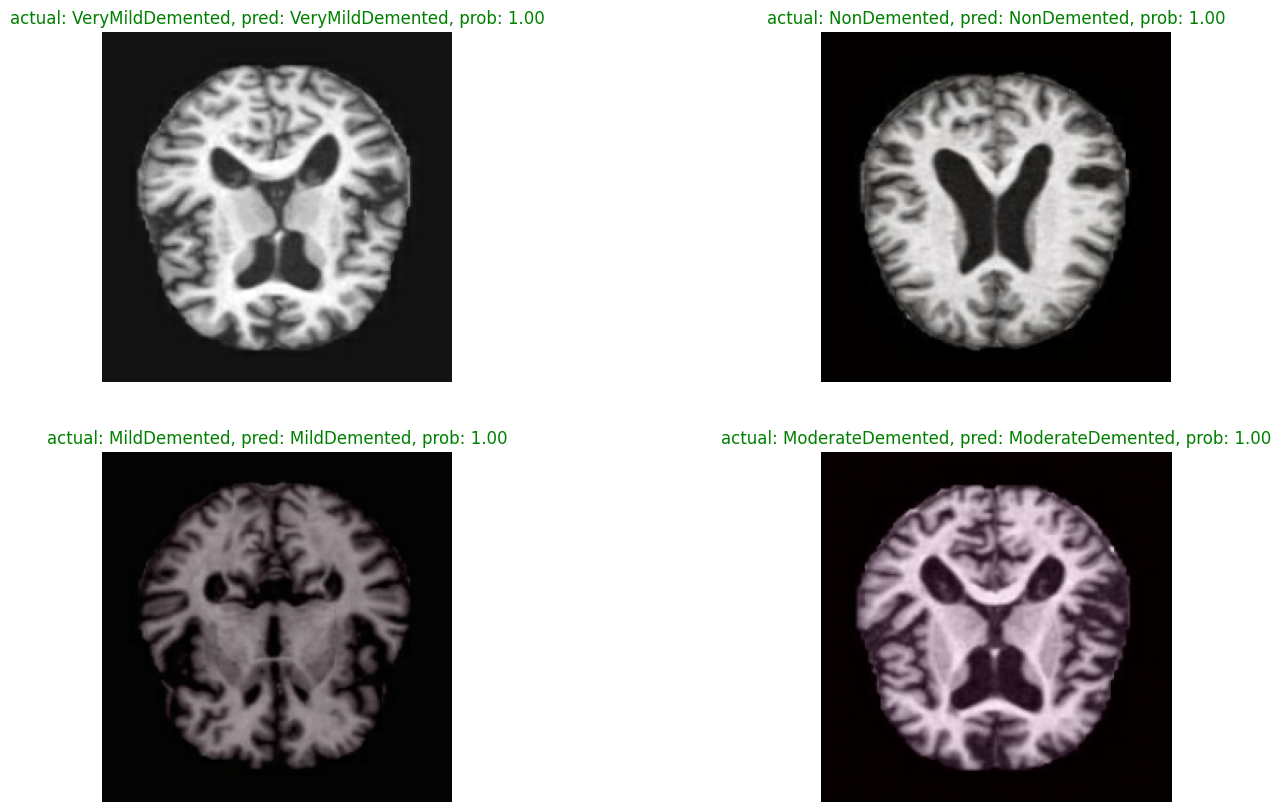

In [27]:
import os
import random

plt.figure(figsize = (17, 10))
for i in range(4):
    # choose a random image from a random class
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir + "/" + class_name + "/" + filename
    # Load the image and make the predictions
    img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions # but for this model we already scaled the image
    pred_prob = model_0.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
    pred_class = class_names[pred_prob.argmax()] # find the predicted class # get the highest prediction probability index
    # Plot the image(s)
    plt.subplot(2, 2, i+1)
    plt.imshow(img/255.)
    if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
      title_color = "g"
    else:
      title_color = "r"
    plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
    plt.axis(False);


In [ ]:
#import tensorflow as tf

# Assuming train_data and test_data are BatchDataset objects containing images and labels

# Define a function to normalize each image in the dataset
#def normalize_image(image, label):
#    image = tf.cast(image, tf.float32) / 255.0
#    return image, label

# Apply the normalization function to each image in the datasets
#train_data_norm = train_data.map(normalize_image)
#test_data_norm = test_data.map(normalize_image)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization

# Load VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create your own Sequential model
model_1 = Sequential()

# Add VGG16 as the first layer (you can freeze it if you want)
model_1.add(vgg16_model)

# Add your custom layers after VGG16
model_1.add(Conv2D(filters=10, kernel_size=3, padding="valid", strides=1, activation="relu"))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(10, activation="relu"))

# Output layer
model_1.add(Dense(4, activation="softmax"))

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),# when fine-tuning you typically want to lower the learning rate by 10x
                metrics = ["accuracy"])

history_2 = model_1.fit(train_data,
                                epochs = 20,
                                validation_data = test_data,
                                validation_steps = int(len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="Alzymersdataset")])


In [ ]:
#import tensorflow as tf
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.callbacks import TensorBoard

# Load VGG16 model
#vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create your own Sequential model
#model_1 = Sequential()

# Add VGG16 as the first layer (you can freeze it if you want)
#model_1.add(vgg16_model)

# Add your custom layers after VGG16
#model_1.add(Conv2D(filters=64, kernel_size=3, padding="valid", activation="relu"))
#model_1.add(BatchNormalization())
#model_1.add(MaxPooling2D(pool_size=(2, 2)))
#model_1.add(Flatten())
#model_1.add(Dense(128, activation="relu"))
#model_1.add(Dense(128, activation="relu"))

# Output layer
#model_1.add(Dense(4, activation="softmax"))

#model_1.compile(
#    loss="categorical_crossentropy",
#    optimizer=Adam(),
#    metrics=["accuracy"]
#)

# Assuming you have your training data in train_data and training labels in train_labels
# Also, you may need to apply data augmentation and preprocess the data based on your use case
# Using ImageDataGenerator for data augmentation
#datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest'
#)

# Assuming you have validation data in val_data and validation labels in val_labels
# You may also need to preprocess the validation data based on your use case
# For validation data, we only rescale, no data augmentation
#val_datagen = ImageDataGenerator(rescale=1./255)

# Set the batch size based on your available resources and problem size
#batch_size = 32

# Create data generators for training and validation data
#train_generator = datagen.flow(train_data, train_labels, batch_size=batch_size)
#val_generator = val_datagen.flow(val_data, val_labels, batch_size=batch_size)

# Train the model
#epochs = 10  # You may need to adjust the number of epochs based on your problem
#tensorboard_callback = TensorBoard(log_dir="logs")  # TensorBoard callback for monitoring training
#model_1.fit(
#    train_generator,
#    epochs=epochs,
#    validation_data=val_generator,
#    validation_steps=int(len(test_data) / batch_size),
#    callbacks=[tensorboard_callback]
#)

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

# Load VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create your own Sequential model
model_1 = Sequential()

# Add VGG16 as the first layer (you can freeze it if you want)
model_1.add(vgg16_model)

# Add your custom layers after VGG16
model_1.add(Conv2D(filters=10, kernel_size=3, padding="valid", strides=1, activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(10, activation="relu"))
model_1.add(Dense(10, activation="relu"))

# Output layer
model_1.add(Dense(4, activation="softmax"))


# Add the VGG16 model layers one by one (except the input layer, since you have it already)
#for layer in vgg16_model.layers[1:]:
#    model_1.add(layer)

# Print the model summary to see the architecture
#model_1.summary()


#model_1.add(Dense(256, activation="relu"))
#model_1.add(Dense(128, activation="relu"))
#model_1.add(Dense(4, activation = "softmax"))

#here we're fine-tuning
#vgg16_model.trainable = True

# Freeze all layers except for the last 10 layers
#for layer in vgg16_model.layers[:-10]:# every layer except last 10 layers
#    layer.trainable = False

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),# when fine-tuning you typically want to lower the learning rate by 10x
                metrics = ["accuracy"])

history_2 = model_1.fit(train_data,
                                epochs = 50,
                                validation_data = test_data,
                                validation_steps = int(len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="Alzymersdataset")])

Saving TensorBoard log files to: tensorflow_hub\Alzymersdataset\20230804-191001
Epoch 1/10
 52/850 [>.............................] - ETA: 2:25:21 - loss: 1.3909 - accuracy: 0.2897

KeyboardInterrupt: 

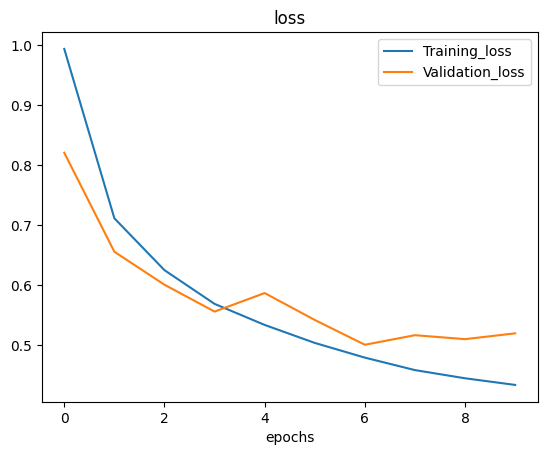

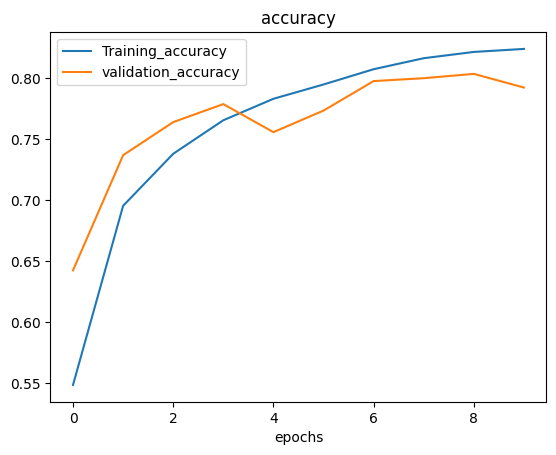

In [26]:
plot_loss_curves(history_2)

In [28]:
# Now fine-tune our model
for layer in vgg16_model.layers[:-10]:
    layer.trainable = False

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower the learning rate for fine-tuning
                metrics=["accuracy"])

history_2_fine_tune = model_1.fit(train_data,
                                epochs=10,
                                validation_data=test_data,
                                validation_steps=int(len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="Alzymersdataset_fine_tune")])



Saving TensorBoard log files to: tensorflow_hub\Alzymersdataset_fine_tune\20230804-172536
Epoch 1/10
850/850 [==============================] - 537s 630ms/step - loss: 0.3626 - accuracy: 0.8590 - val_loss: 0.4726 - val_accuracy: 0.8180
Epoch 2/10
850/850 [==============================] - 526s 619ms/step - loss: 0.3531 - accuracy: 0.8612 - val_loss: 0.4670 - val_accuracy: 0.8224
Epoch 3/10
850/850 [==============================] - 523s 615ms/step - loss: 0.3486 - accuracy: 0.8655 - val_loss: 0.4679 - val_accuracy: 0.8211
Epoch 4/10
850/850 [==============================] - 529s 623ms/step - loss: 0.3452 - accuracy: 0.8678 - val_loss: 0.4671 - val_accuracy: 0.8221
Epoch 5/10
850/850 [==============================] - 525s 618ms/step - loss: 0.3427 - accuracy: 0.8667 - val_loss: 0.4714 - val_accuracy: 0.8218
Epoch 6/10
850/850 [==============================] - 524s 617ms/step - loss: 0.3401 - accuracy: 0.8683 - val_loss: 0.4683 - val_accuracy: 0.8245
Epoch 7/10
850/850 [==============

In [ ]:
from efficientnet.tfkeras import EfficientNetB0

# Loading EfficientNetB0 model
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading EfficientNetB0 model
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create your own Sequential model
model_1 = Sequential()

# Add EfficientNetB0 as the first layer (you can freeze it if you want)
model_1.add(efficientnet_model)

# Add your custom layers after EfficientNetB0
model_1.add(Conv2D(filters=64, kernel_size=3, padding="valid", activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(4, activation="softmax"))  # Adjust the output size based on your problem

# Print the model summary
model_1.summary()

# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Assuming you have your training data in train_data and training labels in train_labels
# Also, you may need to apply data augmentation and preprocess the data based on your use case
# Using ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have validation data in val_data and validation labels in val_labels
# You may also need to preprocess the validation data based on your use case
# For validation data, we only rescale, no data augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Set the batch size based on your available resources and problem size
batch_size = 32

# Create data generators for training and validation data
train_generator = datagen.flow(train_data, train_labels, batch_size=batch_size)
val_generator = val_datagen.flow(val_data, val_labels, batch_size=batch_size)

# Train the model
epochs = 10  # You may need to adjust the number of epochs based on your problem
model_1.fit(train_generator, epochs=epochs, validation_data=val_generator)




from tensorflow.keras.applications import ResNet50

 Loading ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3050 Laptop GPU (UUID: GPU-0d3d24d4-c4f6-5b9c-a576-d8095a8b2817)
